# Housing Supply and Demand Pre- and Post-Financial Crisis 2007-2008

In this notebook I show how I set out to analyse one crisis and ended up unexpectedly seeing  evidence of another more recent crisis: the [2017 housing crisis](https://www.theguardian.com/cities/2018/nov/29/empty-dublin-housing-crisis-airbnb-homelessness-landlords).

<br>

**Research question**

*How have the supply and demand for housing in Dublin, Ireland, evolved before, during and after the 2007-2008 financial crisis?*

The financial crisis of 2007–2008, also known as the global financial crisis and the 2008 financial crisis, is considered by many economists to have been the worst financial crisis since the Great Depression of the 1930s
([source](https://en.wikipedia.org/wiki/Financial\_crisis\_of\_2007-2008)).
In order to answer the research question, I retrieved and aggregated data from multiple sources and compiled the data into a digestible actionable format.

<br>

** Data Sources**

The data for this assignment was sourced from two different websites, namely the [Dublinked Open Data Store](https://data.smartdublin.ie/) and the [Department of Housing, Planning and Local Government](https://www.housing.gov.ie/) websites. The data consists of Dublin City Council planning applications and of national average house price statistics respectively.

<br>

**Findings and Discussion**

The plot indicates that:

* Prior to the financial crisis of 2007-2008, both planning applications (supply) and average house prices (demand) were experiencing sustained year-on-year (YoY) increases, with the rate of increase of house prices appearing to be steeper.

* As of 2006, the increase appears to slow down until, in 2007, both supply and demand collapse dramatically for three consecutive years.

* As of 2009, the worst seems to be over and while applications and prices continue to decrease, they do so at a slower pace.

* Between 2009 and 2012, supply continues to decrease while demand exhibits a sporadic resurgence in 2011.

* As of 2012, the crisis has been overcome and both planning applications and house prices rise again. 


While the answer to the research question was somehwat predictable, i.e. it is well documented that the 2007-2008 financial crisis resulted in a slow down in may sectors of the economy, the main insight from this analysis was somewhat unexpected. Specifically, the rise in supply observed in 2012, is noticeably slower than the rise in housing demand. Indeed, by 2016 average house prices have returned to their pre-crisis level while supply is still considerably below pre-crisis level. In essence, the observed gap between supply and demand explain to some degree why Ireland is experiencing a severe housing crisis.


This notebook was produced in December 2018. 


## Load Data

In [0]:
import pandas as pd
import numpy as np

In [0]:
# Annual New Property prices € (includes houses and apartments)

url = 'https://www.housing.gov.ie/sites/default/files/attachments/41a-price-new-property-area-by_year_1.xlsx'
hp_original = pd.read_excel(url, 
                              encoding='ISO-8859-1',
#                               index_col=0,
                              skipfooter=6, # count from bottom up ...
                              skiprows=range(0,1),
                              header=[0],
                             )
hp_original = hp_original.rename(columns={'Unnamed: 0': 'Year'})
hp_original.head()

,Year,National,Dublin,Cork,Galway,Limerick,Waterford,Other Areas
0,1969/70,6691.519673,7050.855550,NaN,NaN,NaN,NaN,NaN
1,1970/71,7523.198115,7913.007705,6631.841984,6975.941003,6012.209801,6104.900681,6427.414153
2,1971/72,8249.488296,8527.560935,7675.566684,8866.581002,6733.421030,6226.795537,7198.145167
3,1972/73,9008.791666,9205.601069,7678.106160,9404.949947,7449.553306,6927.690956,8053.948631
4,1974,10835.944761,10942.602760,9808.726656,13356.374847,10514.701027,9571.285635,10851.181618


In [0]:
import pandas as pd

url = 'http://opendata.dublincity.ie/PandDOpenData/DCC_PlanApps.csv'
planapps_original = pd.read_csv(url, encoding='ISO-8859-1')
planapps_original.Plan_Ref = planapps_original.Plan_Ref.apply(lambda x: x.strip())
planapps_original.head()



,Plan_Ref,FGDATE,Easting,PROPOSAL,LONG_PROPOSAL,APPDATE,Northing,LOCATION,STAGE,DECDATE,REGDATE,APPTYPE,DECISION
0,1840/04,27-05-2004,-6.310076,single storey extension to the side of the abo...,NaN,08-03-2004,53.398759,65a Northway Estate Finglas Dublin 11,Decision Appealed,19-04-2004,08-03-2004,Permission,GRANT PERMISSION
1,1845/04,28-09-2004,-6.264926,Erection of 2 number 2 storey semi detached 2...,NaN,09-03-2004,53.380527,St Margarets No 98 Ballymun Road Dublin 9,Appeal Decided,29-04-2004,09-03-2004,Permission,GRANT PERMISSION
2,1912/04,29-06-2004,-6.186908,Construction of new two storey end of terrace ...,NaN,12-03-2004,53.381353,1 Lein Road Harmonstown Dublin 5,Decision Appealed,14-05-2004,12-03-2004,Permission,GRANT PERMISSION
3,1004/04,07-04-2004,-6.242177,PROTECTED STRUCTURE-Demolish conservatory & re...,NaN,02-01-2004,53.329422,65 Wellington Road Dublin 4,Decision Appealed,25-02-2004,02-01-2004,Permission,GRANT PERMISSION
4,1886/04,18-06-2004,-6.286418,construction of a two storey 4 bedroom detache...,NaN,11-03-2004,53.384105,3 Fairways Green Glasnevin Dublin 11,Decision Appealed,05-05-2004,11-03-2004,Permission,GRANT PERMISSION


## Data Pre-processing

In [0]:
# Planning Applications 
planapps = planapps_original.copy()

# keep subset of decsions
planapps = (planapps[(planapps.DECISION=='GRANT PERMISSION') | 
                     (planapps.DECISION=='REFUSE PERMISSION')])

# drop cols
planapps.drop('LONG_PROPOSAL', axis=1, inplace=True)
planapps.drop('FGDATE', axis=1, inplace=True) 
planapps.drop('REGDATE', axis=1, inplace=True)

# drop STAGE as its values don't seem to be consistent 
planapps.drop('STAGE', axis=1, inplace=True)

# drop APPTYPE: treat all as same 
planapps.drop('APPTYPE', axis=1, inplace=True)


# drop na
planapps.dropna(axis=0, inplace=True) # only three missing data cases after removing STAGE col

# convert to dt
planapps['APPDATE'] =  pd.to_datetime(planapps['APPDATE'], format='%d-%m-%Y')
planapps['DECDATE'] =  pd.to_datetime(planapps['DECDATE'], format='%d-%m-%Y')

# restrict to 2005-2016 to match the house price dataset
planapps = planapps[(planapps.APPDATE.dt.year>2004) & (planapps.APPDATE.dt.year<2017)]
planapps.head()


,Plan_Ref,Easting,PROPOSAL,APPDATE,Northing,LOCATION,DECDATE,DECISION
1569,2675/04,-6.266329,Protected Structure chage of use of from use a...,2005-05-04,53.345302,Clarence Hotel 6/8 Wellington Quay 6/8 Essex ...,2004-06-23,REFUSE PERMISSION
7147,1067/05,-6.221918,Permanent retention of increase in height of e...,2005-01-12,53.338519,27 Bath Street Dublin 4,2005-03-03,GRANT PERMISSION
7148,1068/05,-6.254288,Demolition of single storey extension and cons...,2005-01-12,53.317899,99 Moyne Road Dublin 6,2005-03-08,GRANT PERMISSION
7149,1075/05,-6.232503,Demolition of existing shed to rear and constr...,2005-01-13,53.395495,61 Castletimon Road Dublin 5,2005-03-07,GRANT PERMISSION
7150,1080/05,-6.267949,Permission sought for a bathroom in the existi...,2005-01-13,53.366426,41 Iona Road Glasnevin Dublin 9,2005-02-23,GRANT PERMISSION


In [0]:
# House price data pre-processing
hp = hp_original.copy()

# remove rows where data spansa two years e.g. 1972/73
hp.drop(hp.index[:4], inplace=True)

# convert to datetime
hp.Year =  pd.to_datetime(hp.Year, format='%Y')

# set Year as index
hp.set_index(hp.Year.dt.year, inplace=True)

# # get Dublin data only
price_dublin = hp[hp.Year.dt.year > 2004].loc[:, 'Dublin ']

hp.head()
price_dublin.tail()


Year
2012    265633.0
2013    300466.0
2014    333720.0
2015    377741.0
2016    397676.0
Name: Dublin , dtype: float64

## Plot Data

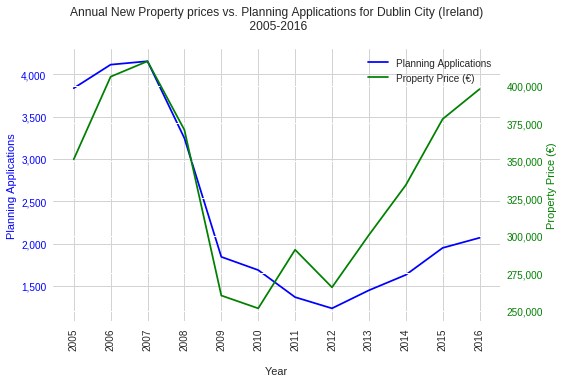

In [0]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# %matplotlib inline

fig, ax1 = plt.subplots(figsize=(8,5))

# price data
data_prices = price_dublin.values

# planning data
applications = planapps.groupby(planapps.APPDATE.dt.year)['Plan_Ref'].count()

# plot plannins applications
line1 = ax1.plot(applications, 
         'b-', 
         label='Planning Applications')
ax1.set_ylabel('Planning Applications', color='b')
ax1.tick_params('y', colors='b')

# plot property prices
ax2 = ax1.twinx()
line2 = ax2.plot(price_dublin,
         'g-',
         label='Property Price (€)')
ax2.set_ylabel('Property Price (€)', color='g')
ax2.tick_params('y', colors='g')


# x-axis ticks amd label
xtickslocs = np.arange(2005, 2017, step=1)
ax1.xaxis.set_major_locator(mticker.FixedLocator(xtickslocs))
ax1.set_xticklabels(xtickslocs, rotation=90)
ax1.set_xlabel('\nYear')

# y-axis number formatting
ax1.get_yaxis().set_major_formatter(mticker.FuncFormatter(lambda x, 
                                                          p: format(int(x), 
                                                                    ',')))
ax2.get_yaxis().set_major_formatter(mticker.FuncFormatter(lambda x, 
                                                          p: format(int(x), 
                                                                    ',')))

# legends
lns = line1 + line2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

# Title
plt.title('Annual New Property prices vs. Planning Applications for Dublin City (Ireland)\n 2005-2016\n')

# background and grid
ax1.patch.set_visible(False)
# plt.grid(None)
ax1.grid(b=True, which='major', color='lightgray', linestyle='-')#, axis='x')
plt.show()